<a href="https://colab.research.google.com/github/umiSirya/MachineLearning_2/blob/main/Brain_tumors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras
!pip install --upgrade scikeras scikit-learn
!pip show scikeras scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
Name: scikeras
Version: 0.13.0
Summary: Scikit-Learn API wrapper for Keras.
Home-page: https://github.com/adriangb/scikeras
Author: Adrian Garcia Badaracco
Author-email: 1755071+adriangb@users.noreply.github.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: keras, scikit-learn
Required-by: 
---
Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * R

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

# **Getting the dataset**

In [3]:
!kaggle datasets download -d arifmia/brain-tumor-mri-image-dataset-updated

Dataset URL: https://www.kaggle.com/datasets/arifmia/brain-tumor-mri-image-dataset-updated
License(s): apache-2.0
 97% 84.0M/86.9M [00:05<00:00, 21.7MB/s]
100% 86.9M/86.9M [00:05<00:00, 16.3MB/s]


In [4]:
#Unzip the datastet
!unzip -q brain-tumor-mri-image-dataset-updated.zip

In [5]:
#List of foloders
!ls image_dataset

Testing  Training


In [6]:
!ls image_dataset//Training

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [7]:
#Checking for the total number of values per folder
import os
training = len(os.listdir('image_dataset//Training'))
testing = len(os.listdir('image_dataset//Testing'))

print(training, testing)

4 4


In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def view_random_image(dataset_path, target_class='Testing'):
    class_path = os.path.join(dataset_path, target_class)

    all_images = []
    for root, dirs, files in os.walk(class_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                all_images.append(os.path.join(root, file))

    if not all_images:
        raise FileNotFoundError(f"No image files found in {class_path}")

    random_image_path = random.choice(all_images)

    img = Image.open(random_image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Random Image from {target_class}")
    plt.show()


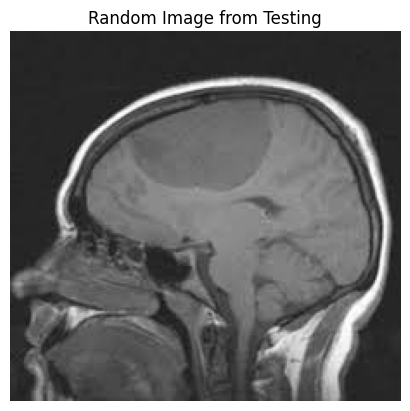

In [9]:
#View a random image form the dataset
img = view_random_image('/content/image_dataset', target_class='Testing')

**Dataset already split into train and test**

# **Preprocessing the datasets**


In [10]:
train= len(os.listdir("/content/image_dataset/Training"))
train

4

In [11]:
test= len(os.listdir("/content/image_dataset/Testing"))
test

4

In [12]:
#Prepocessing the train dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator with Augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    '/content/image_dataset/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)




Found 2870 images belonging to 4 classes.


Found 2870 images belonging to 4 classes.


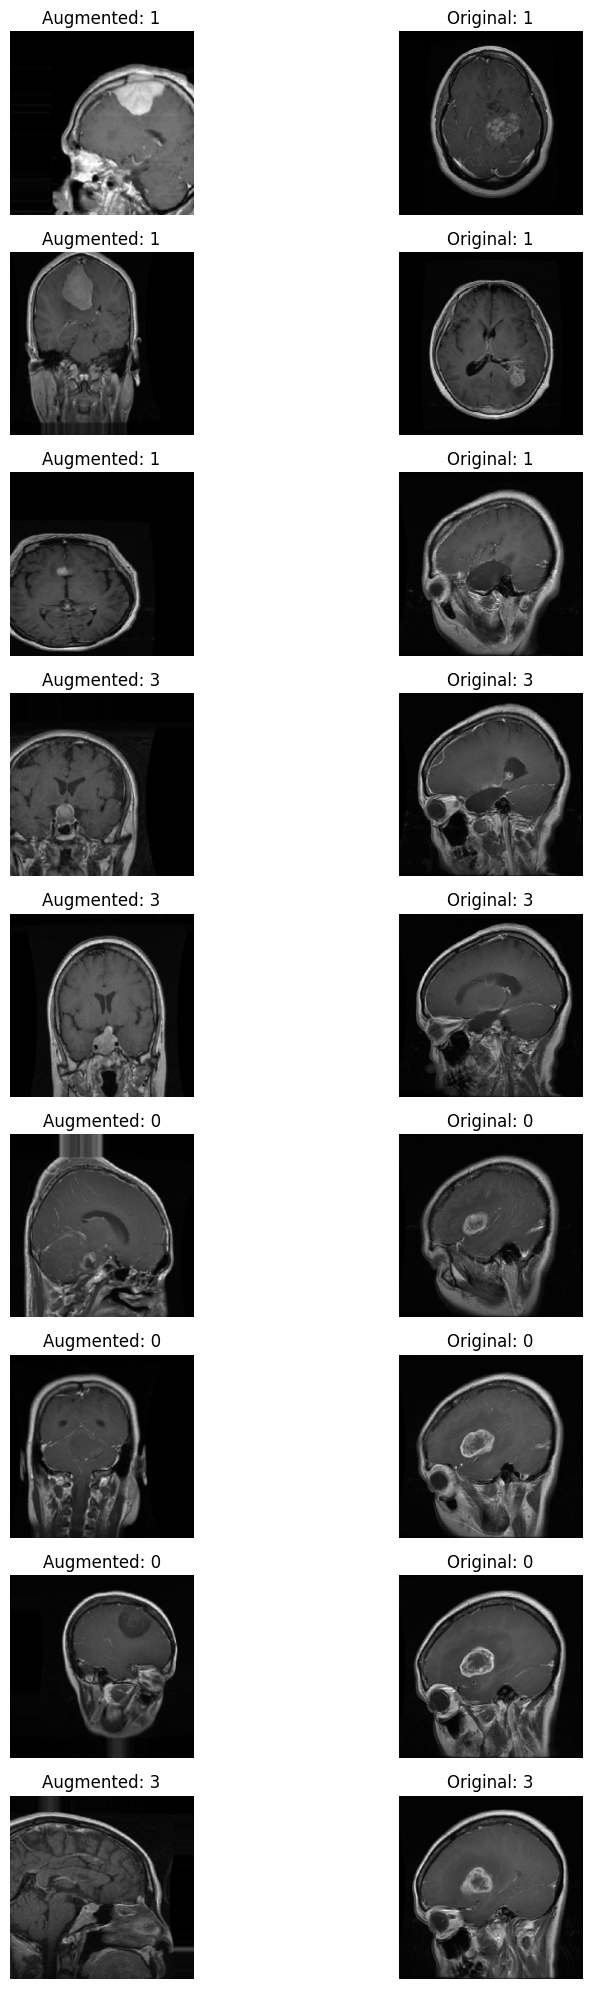

In [13]:
import matplotlib.pyplot as plt
import numpy as np

imgs, labels = next(train_data)

# Assuming 'imgs' contains the augmented images

# Get a batch of original images (without augmentation)
original_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for originals
original_data = original_datagen.flow_from_directory(
    '/content/image_dataset/Training',  # Same directory as augmented images
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order consistent
)
original_imgs, _ = next(original_data)

# Display augmented and original images side-by-side
fig, axes = plt.subplots(9, 2, figsize=(10, 20))  # 9 rows, 2 columns for comparison

for i in range(9):
    # Augmented image
    axes[i, 0].imshow(imgs[i])
    axes[i, 0].set_title(f"Augmented: {np.argmax(labels[i])}")
    axes[i, 0].axis('off')

    # Original image
    axes[i, 1].imshow(original_imgs[i])
    axes[i, 1].set_title(f"Original: {np.argmax(labels[i])}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [14]:
#Preprocessing the test dataset
# Initialize the ImageDataGenerator without any augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/image_dataset/Testing',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 394 images belonging to 4 classes.


# **Building the CNN (convolution neural network)**

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile and train the model
model.compile(optimizer = 'adam',
              loss = 'CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 449ms/step - accuracy: 0.2889 - loss: 1.4923 - val_accuracy: 0.3604 - val_loss: 1.6574
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.4562 - loss: 1.1624 - val_accuracy: 0.3198 - val_loss: 2.6078
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 383ms/step - accuracy: 0.5676 - loss: 0.9841 - val_accuracy: 0.3731 - val_loss: 3.0004
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.6006 - loss: 0.9141 - val_accuracy: 0.3325 - val_loss: 2.6875
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 377ms/step - accuracy: 0.6287 - loss: 0.8626 - val_accuracy: 0.3706 - val_loss: 3.1760
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 371ms/step - accuracy: 0.6483 - loss: 0.8321 - val_accuracy: 0.3756 - val_loss: 3.9992
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 365ms/step - accuracy: 0.6447 - loss: 0.8285 - val_accuracy: 0.3452 - val_loss: 3.5340
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.6688 - loss: 0.7734 - val_accuracy: 0.385

# **Model Evaluation**

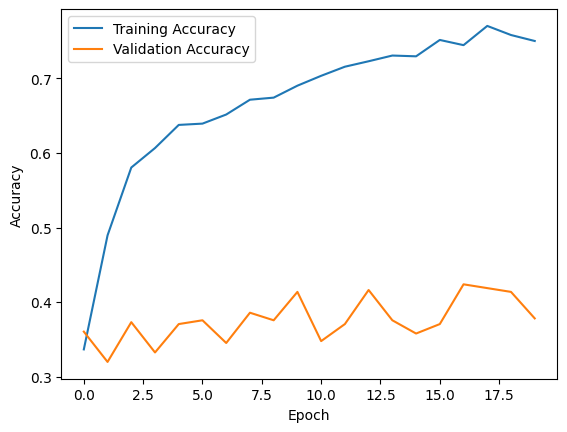

In [19]:
#Evalauting the model using a graph for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

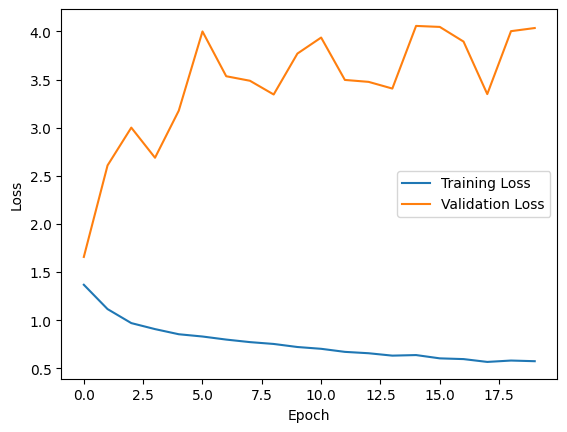

In [20]:
#Evalauting the model using a graph for loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Hyperparameter Tuning using Randamized Search**

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterSampler

# Define a function to create the CNN model
def create_model(conv_filters=32, dense_units=128, kernel_size=(3, 3), learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(conv_filters, kernel_size, activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(conv_filters * 2, kernel_size, activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(conv_filters * 4, kernel_size, activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # 4 classes
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the hyperparameter grid
param_grid = {
    'conv_filters': [32, 64],
    'dense_units': [128, 256],
    'kernel_size': [(3, 3), (5, 5)],
    'learning_rate': [0.001, 0.0001],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# Manual random search function
def random_search(train_data, test_data, param_grid, n_iter=10):
    param_list = list(ParameterSampler(param_grid, n_iter=n_iter))
    best_score = -np.inf
    best_params = None

    for params in param_list:
        print(f"Testing parameters: {params}")

        # Create the model with current parameters
        model = create_model(conv_filters=params['conv_filters'],
                             dense_units=params['dense_units'],
                             kernel_size=params['kernel_size'],
                             learning_rate=params['learning_rate'])

        # Train the model
        early_stopping = EarlyStopping(monitor='val_loss', patience=3)
        history = model.fit(
            train_data,
            validation_data=test_data,
            batch_size=params['batch_size'],
            epochs=params['epochs'],
            callbacks=[early_stopping],
            verbose=0
        )

        # Get validation accuracy
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy: {val_accuracy:.4f}")

        # Update the best parameters if the current accuracy is higher
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_params = params

    return best_params, best_score

# Hyperparameter tuning using random search
best_params, best_score = random_search(train_data, test_data, param_grid, n_iter=10)

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_score)


Testing parameters: {'learning_rate': 0.001, 'kernel_size': (3, 3), 'epochs': 10, 'dense_units': 256, 'conv_filters': 64, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.3325
Testing parameters: {'learning_rate': 0.0001, 'kernel_size': (3, 3), 'epochs': 20, 'dense_units': 256, 'conv_filters': 32, 'batch_size': 32}
Validation Accuracy: 0.3807
Testing parameters: {'learning_rate': 0.001, 'kernel_size': (5, 5), 'epochs': 10, 'dense_units': 256, 'conv_filters': 64, 'batch_size': 32}
Validation Accuracy: 0.3198
Testing parameters: {'learning_rate': 0.001, 'kernel_size': (5, 5), 'epochs': 10, 'dense_units': 256, 'conv_filters': 32, 'batch_size': 32}
Validation Accuracy: 0.2919
Testing parameters: {'learning_rate': 0.001, 'kernel_size': (5, 5), 'epochs': 20, 'dense_units': 128, 'conv_filters': 64, 'batch_size': 16}
Validation Accuracy: 0.2716
Testing parameters: {'learning_rate': 0.0001, 'kernel_size': (5, 5), 'epochs': 20, 'dense_units': 256, 'conv_filters': 32, 'batch_size': 32}
Validation Accuracy: 0.3223
Testing parameters: {'learning_rate': 0.0001, 'kernel_size': (5, 5), 'epochs': 10, 'dense_units': 128, 'conv_filters': 32, 'batch_